# Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Вводим функцию поля диполя

In [14]:
def p_field(x, y, z, px, py, pz, k):
    r_ = np.array([x, y, z])
    r = np.linalg.norm(r_)
    p_ = np.array([px, py, pz])
    n_ = r_/r
    a = r/k
    k0r3 = r**(-3) 
    k1r2 = k0r3*a
    k2r1 = k1r2*a
    return (p_ * np.complex(k2r1-k0r3, k1r2) + n_ * np.dot(n_, p_) * np.complex(-k2r1+3*k0r3, -3*k1r2))*np.exp(np.complex(0, k*r))

# Графически проверим корректность работы

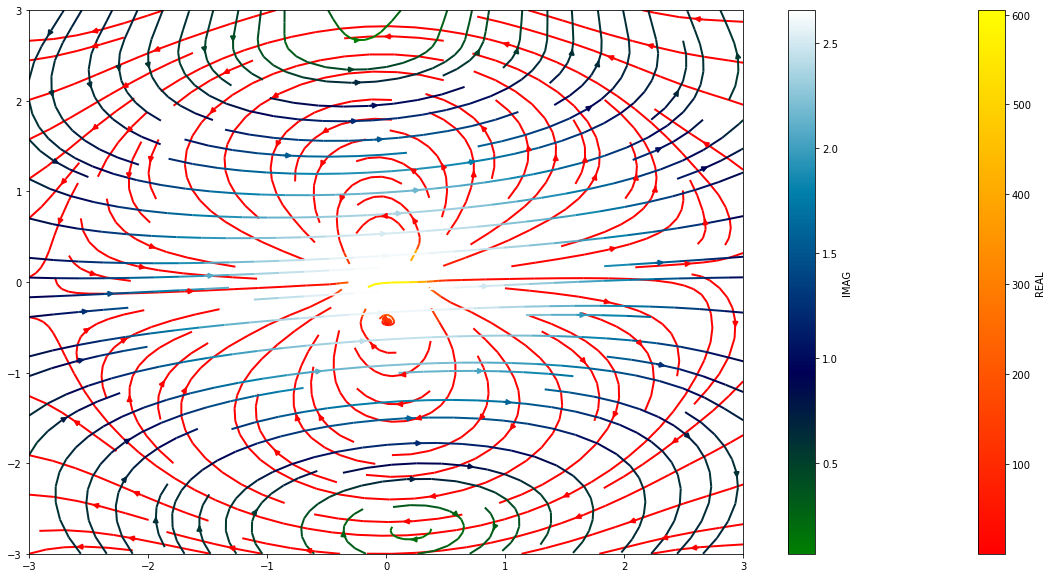

CPU times: user 3.48 s, sys: 20 ms, total: 3.5 s
Wall time: 3.47 s


In [15]:
%%time
def p_field_2d(x, y, px, py, k):
    E = p_field(x, y, 0, px, py, 0, k)
    return (np.real(E[0]), np.real(E[1]), np.imag(E[0]), np.imag(E[1]))

Y, X = np.mgrid[-3:3:20j, -3:3:20j]
G = np.array([[p_field_2d(x2, y2, 4., 0.3, 1) for (x2, y2) in zip(x1, y1)] for (x1, y1) in zip(X, Y)])
Ur, Vr, Ui, Vi = G[:, :, 0], G[:, :, 1], G[:, :, 2], G[:, :, 3]
fig0, ax0 = plt.subplots(figsize=(20, 10))
strm0 = ax0.streamplot(X, Y, Ur, Vr, color=(Ur**2+Vr**2)**0.5, linewidth=2, cmap=plt.cm.autumn)
strm1 = ax0.streamplot(X, Y, Ui, Vi, color=(Ui**2+Vi**2)**0.5, linewidth=2, cmap=plt.cm.ocean)
fig0.colorbar(strm0.lines, label='REAL')
fig0.colorbar(strm1.lines, label='IMAG')
plt.show()

del p_field_2d, Y, X, G, Ur, Vr, Ui, Vi, fig0, strm0, strm1

# Введём функцию, считающую блоки 3 на 3, которые можно будет выделить в матрице T. Убедимся глазами, что заново переопределённая через неё функция, считающая поле диполя, работает по-прежнему.

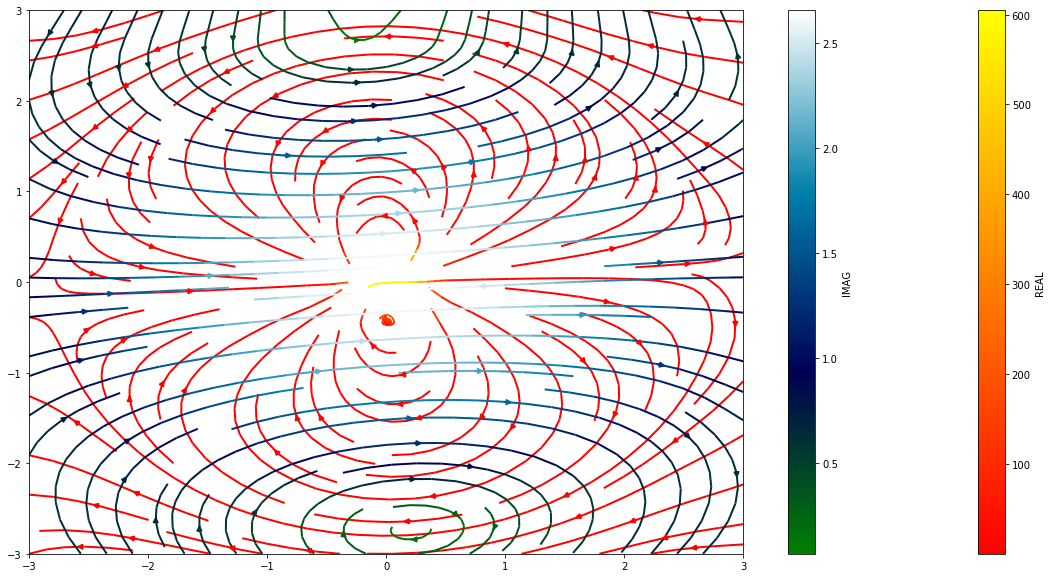

In [16]:
def T_coefs(x, y, z, k):
    r_ = np.array([x, y, z])
    r = np.linalg.norm(r_)
    if r==0:
        return np.zeros([3, 3])
    n_ = r_/r
    k0r3 = r**(-3) 
    k1r2 = k * r**(-2)
    k2r1 = k**2 / r
    return (np.identity(3) * np.complex(k2r1-k0r3, k1r2) + np.tensordot(n_, n_, axes=0) * np.complex(-k2r1+3*k0r3, -3*k1r2))*np.exp(np.complex(0, k*r))

def p_field(x, y, z, px, py, pz, k):
    p_ = np.array([px, py, pz])
    return(np.dot(T_coefs(x, y, z, k), p_))

def p_field_2d(x, y, px, py, k):
    E = p_field(x, y, 0, px, py, 0, k)
    return (np.real(E[0]), np.real(E[1]), np.imag(E[0]), np.imag(E[1]))

Y, X = np.mgrid[-3:3:20j, -3:3:20j]
G = np.array([[p_field_2d(x2, y2, 4., 0.3, 1) for (x2, y2) in zip(x1, y1)] for (x1, y1) in zip(X, Y)])
Ur, Vr, Ui, Vi = G[:, :, 0], G[:, :, 1], G[:, :, 2], G[:, :, 3]
fig0, ax0 = plt.subplots(figsize=(20, 10))
strm0 = ax0.streamplot(X, Y, Ur, Vr, color=(Ur**2+Vr**2)**0.5, linewidth=2, cmap=plt.cm.autumn)
strm1 = ax0.streamplot(X, Y, Ui, Vi, color=(Ui**2+Vi**2)**0.5, linewidth=2, cmap=plt.cm.ocean)
fig0.colorbar(strm0.lines, label='REAL')
fig0.colorbar(strm1.lines, label='IMAG')
plt.show()

del p_field_2d, Y, X, G, Ur, Vr, Ui, Vi, fig0, strm0, strm1

In [17]:
wavelength = 1. #Длина волны
d = np.ones(3)*wavelength*0.1 #Расстояние между диполями по осям x, y, z
N = [50, 50, 50] #Количество слоёв диполей по каждому измерению
polarizability = 1e-06 #Здесь нужно будет написать результат третьей задачи
A = np.tensordot(np.ones(N)*polarizability, np.identity(3), axes=0) #Поляризуемости диполей
k = 2*np.pi/wavelength

# Посчитаем, какие коэффициенты в матрице T будут возникать из-за отдельно взятого диполя, находящегося в начале координат. Поскольку матрицы Теплицевые, остальные коэффициенты будут заполняться аналогично.

In [18]:
%%time
T_1st_dipole_coefs = np.zeros(N+[3, 3], dtype=complex)
for x_index in range(N[0]):
    for y_index in range(N[1]):
        for z_index in range(N[2]):
            T_1st_dipole_coefs[x_index, y_index, z_index] = T_coefs(x_index*d[0], y_index*d[1], z_index*d[2], k)

CPU times: user 12.5 s, sys: 8 ms, total: 12.6 s
Wall time: 12.4 s


In [19]:
T_coefs(x_index*d[0], y_index*d[1], z_index*d[2], k)

array([[-3.09080992+0.25206757j,  1.55086499-0.03895935j,
         1.55086499-0.03895935j],
       [ 1.55086499-0.03895935j, -3.09080992+0.25206757j,
         1.55086499-0.03895935j],
       [ 1.55086499-0.03895935j,  1.55086499-0.03895935j,
        -3.09080992+0.25206757j]])

In [20]:
T_1st_dipole_coefs[x_index, y_index, z_index]

array([[-3.09080992+0.25206757j,  1.55086499-0.03895935j,
         1.55086499-0.03895935j],
       [ 1.55086499-0.03895935j, -3.09080992+0.25206757j,
         1.55086499-0.03895935j],
       [ 1.55086499-0.03895935j,  1.55086499-0.03895935j,
        -3.09080992+0.25206757j]])

In [21]:
T_1st_dipole_coefs.shape

(50, 50, 50, 3, 3)

# Строго говоря, идентичными блоками мы можем заполнить лишь восьмую часть нашей матрицы, те поля, которые возникают в интересующих нас точках  n от диполей в точках m, таких, что по любой из осей x, y или z точка n от начала координат дальше, чем точка m. Необходимо выяснить, что будет от перемены знаков разности коэффициентов по каким-либо осям.

### Меняем знак z

In [22]:
T_coefs(x_index*d[0], y_index*d[1], -z_index*d[2], k)==T_coefs(x_index*d[0], y_index*d[1], z_index*d[2], k)

array([[ True,  True, False],
       [ True,  True, False],
       [False, False,  True]], dtype=bool)

In [23]:
T_coefs(x_index*d[0], y_index*d[1], -z_index*d[2], k)/T_coefs(x_index*d[0], y_index*d[1], z_index*d[2], k)

array([[ 1.-0.j,  1.+0.j, -1.+0.j],
       [ 1.+0.j,  1.-0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j,  1.-0.j]])

# Мы получили, что при перемене знаков по одной из координат в блоке 3 на 3 в Теплицевой матрице просто меняются знаки у недиагональных элементов в строке и в столбце, соответствующих этой координате. Можно проверить ряд свойств, связанных с антисимметрией этих элементов по одной координате. Эти элементы должны зануляться при занулении соответствующих координат.

In [24]:
T_1st_dipole_coefs[0, 0, 0] #Диполь не поляризует сам себя

array([[ 0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j]])

In [25]:
T_1st_dipole_coefs[0, 0, 5] #Всё работает

array([[-70.95683521-25.13274123j,  -0.00000000 +0.j        ,
         -0.00000000 +0.j        ],
       [ -0.00000000 +0.j        , -70.95683521-25.13274123j,
         -0.00000000 +0.j        ],
       [ -0.00000000 +0.j        ,  -0.00000000 +0.j        ,
        -16.00000000+50.26548246j]])

In [26]:
T_1st_dipole_coefs[0, 10, 10] #Всё работает

array([[-25.26661467+11.45103956j,  -0.00000000 +0.j        ,
         -0.00000000 +0.j        ],
       [ -0.00000000 +0.j        , -11.32418952 +8.6031603j ,
         13.94242515 -2.84787926j],
       [ -0.00000000 +0.j        ,  13.94242515 -2.84787926j,
        -11.32418952 +8.6031603j ]])

# То, что было предложено для циркулярных матриц

In [27]:
def circulant_apply(c, vect):
    return np.fft.ifft(np.fft.fft(c)*np.fft.fft(vect))

### И для Теплицевых

In [28]:
def toeplitz_apply(a_positive, vect):
    a = list(a_positive)
    a = np.append(a + [0], - np.array(list(reversed(a)))) #Случай (для проверки алгоритма), где матрица антисимметрична. 
    #Вообще для разных элементов блока 3 на 3 будет своя специфика при смене знаков индексов.
    a = a[:-1]
    n = len(vect)
    return circulant_apply(a, np.append(vect, np.zeros(n)))[:n]

### Убедимся, что это работает

In [29]:
toepl = np.array([[1, 0, -4, -5],
                  [0, 1, 0, -4],
                  [4, 0, 1, 0],
                  [5, 4, 0, 1]])
t = toepl[:, 0]
t

array([1, 0, 4, 5])

In [30]:
vect = np.array([1, 1, 0, 3])
np.absolute(toeplitz_apply(t, vect)-toepl.dot(vect))

array([  1.60427227e-14,   1.31087992e-14,   1.24344979e-14,
         3.55745964e-15])

In [31]:
def multicirculant_apply(c, vect):
    return np.fft.ifftn(np.fft.fftn(c)*np.fft.fftn(vect))

### Функция, считающая недостающее количество элементов до степени двойки

In [41]:
def two(g):
    return int(2 ** (np.ceil(np.log2(g))) - g)

In [82]:
%%time
def multitoeplitz_apply(a, E):
    n = np.array(E.shape[1:])
    additional_zeros = np.array([two(i) for i in n])
    signs_flipped = np.array([[[1, -1, -1], [-1, 1, 1], [-1, 1, 1]],
                                [[1, -1, 1], [-1, 1, -1], [1, -1, 1]],
                                [[1, 1, -1], [1, 1, -1], [-1, -1, 1]]])
    sh = a.shape
    #Учтём влияние диполей в сторону уменьшения координаты x:
    a = np.append(a, np.zeros([additional_zeros[0]+1, sh[1], sh[2], 3, 3]), axis=0)
    a = np.append(a, np.tensordot(a[:-1, :, :][::-1, :, :], signs_flipped[0], axes=([4], [0])), axis=0)[:-1, :, :]
    
    sh = a.shape
    #Учтём влияние диполей в сторону уменьшения координаты y:
    a = np.append(a, np.zeros([sh[0], additional_zeros[1]+1, sh[2], 3, 3]), axis=1)
    a = np.append(a, np.tensordot(a[:, :-1, :][:, ::-1, :], signs_flipped[1], axes=([4], [0])), axis=1)[:, :-1, :]
    
    sh = a.shape
    #Учтём влияние диполей в сторону уменьшения координаты z:
    a = np.append(a, np.zeros([sh[0], sh[1], additional_zeros[2]+1, 3, 3]), axis=2)
    a = np.append(a, np.tensordot(a[:, :, :-1][:, :, ::-1], signs_flipped[2], axes=([4], [0])), axis=2)[:, :, :-1]
    TE=np.zeros([3]+list(n+additional_zeros), dtype=complex)
    double_vector = np.zeros(list(2*(n+additional_zeros)), dtype=complex)
    for i in range(3):
        for j in range(3):
            double_vector[:n[0], :n[1], :n[2]] = E[j]
            TE[i] = TE[i] + multicirculant_apply(a[:, :, :, i, j], double_vector)[:additional_zeros[0]+n[0], :additional_zeros[1]+n[1], :additional_zeros[2]+n[2]]
    return TE[:, :n[0], :n[1], :n[2]]

print(multitoeplitz_apply(T_1st_dipole_coefs, np.ones([3, 50, 50, 50], dtype=complex)).shape)

(3, 50, 50, 50)
CPU times: user 5.39 s, sys: 668 ms, total: 6.06 s
Wall time: 6.06 s


In [81]:
multitoeplitz_apply(T_1st_dipole_coefs, np.ones([3, 50, 50, 50]))

array([[[[ -7.98130853e+03 +4.43526617e+03j,
           -9.89250870e+03 +4.46515509e+03j,
           -1.00142338e+04 +3.62498114e+03j, ...,
           -4.50055155e+03 -3.65094898e+03j,
           -4.36263791e+03 -4.74135993e+03j,
           -4.54261549e+03 -5.02567581e+03j],
         [ -9.89250870e+03 +4.46515509e+03j,
           -1.16916276e+04 +4.28051479e+03j,
           -1.16428160e+04 +3.47451503e+03j, ...,
           -6.18659636e+03 -3.15314604e+03j,
           -5.65332987e+03 -4.43811891e+03j,
           -5.12633660e+03 -5.22658736e+03j],
         [ -1.00142338e+04 +3.62498114e+03j,
           -1.16428160e+04 +3.47451503e+03j,
           -1.14461625e+04 +2.92309593e+03j, ...,
           -7.11036005e+03 -2.12499802e+03j,
           -6.23042437e+03 -3.32521795e+03j,
           -5.30022833e+03 -4.30151651e+03j],
         ..., 
         [ -4.50055155e+03 -3.65094898e+03j,
           -6.18659636e+03 -3.15314604e+03j,
           -7.11036005e+03 -2.12499802e+03j, ...,
           -1.126

## Всё работает. Сохраним коэффициенты циркулярной матрицы a, чтобы каждый раз заново не считать, оптимизируем функцию умножения. (При желании изменить количество диполей надо переопределять лаконичную быструю функцию заново!)

In [85]:
#%%time
a = T_1st_dipole_coefs
additional_zeros = np.array([two(i) for i in N])
signs_flipped = np.array([[[1, -1, -1], [-1, 1, 1], [-1, 1, 1]],
                          [[1, -1, 1], [-1, 1, -1], [1, -1, 1]],
                          [[1, 1, -1], [1, 1, -1], [-1, -1, 1]]])
sh = a.shape
#Учтём влияние диполей в сторону уменьшения координаты x:
a = np.append(a, np.zeros([additional_zeros[0]+1, sh[1], sh[2], 3, 3]), axis=0)
a = np.append(a, np.tensordot(a[:-1, :, :][::-1, :, :], signs_flipped[0], axes=([4], [0])), axis=0)[:-1, :, :]
    
sh = a.shape
#Учтём влияние диполей в сторону уменьшения координаты y:
a = np.append(a, np.zeros([sh[0], additional_zeros[1]+1, sh[2], 3, 3]), axis=1)
a = np.append(a, np.tensordot(a[:, :-1, :][:, ::-1, :], signs_flipped[1], axes=([4], [0])), axis=1)[:, :-1, :]

sh = a.shape
#Учтём влияние диполей в сторону уменьшения координаты z:
a = np.append(a, np.zeros([sh[0], sh[1], additional_zeros[2]+1, 3, 3]), axis=2)
a = np.append(a, np.tensordot(a[:, :, :-1][:, :, ::-1], signs_flipped[2], axes=([4], [0])), axis=2)[:, :, :-1]

print(a.shape)

(128, 128, 128, 3, 3)


### Ради быстродействия и чтобы не заморачиваться с тензорами конкретно сейчас я буду просто умножать на число polarizability

In [86]:
a = a*polarizability

In [90]:
n = np.array(N)
double_vector = np.zeros(list(2*(n+additional_zeros)), dtype=complex)

def AT(E):
    ATE=np.zeros([3]+list(n), dtype=complex)
    for i in range(3):
        for j in range(3):
            double_vector[:n[0], :n[1], :n[2]]=E[j]
            ATE[i] = ATE[i] + multicirculant_apply(a[:, :, :, i, j], double_vector)[:n[0], :n[1], :n[2]]
    
    return ATE

In [91]:
Ampl = 1.
E_inc = np.tensordot(np.tensordot(Ampl * np.array([1, 0, 0]), np.ones([N[0], N[1]]), axes=0), \
                     np.exp(1j * k * np.arange(N[2]) * d[2]), axes=0)
E_inc.shape

(3, 50, 50, 50)

In [92]:
%%time
E = np.zeros([3]+N, dtype=complex)

print(np.mean(np.absolute(E_inc-E)))
for i in range(20):
    E_next = E_inc + AT(E)
    print(np.mean(np.absolute(E_next-E)))
    E = E_next

0.333333333333
0.333333333333
0.0563620657545
0.00639815091304
0.000596283334888
4.80993649085e-05
3.61928560807e-06
2.73764105598e-07
2.14331244196e-08
1.74099072734e-09
1.53078987971e-10
1.49867956383e-11
1.56297990335e-12
1.6493068676e-13
1.7349709441e-14
1.8069675473e-15
1.86259860713e-16
2.24529910106e-17
7.05755474452e-18
5.95295102495e-18
6.01171604181e-18
CPU times: user 1min 37s, sys: 10.9 s, total: 1min 48s
Wall time: 1min 48s


## Нас интересует смотреть на среднюю величину поля по времени и по слою. Берём модуль вектора трёхмерном комплексном пространстве (мнимые части нужны для усреднения по времени) и усредняем по слоям.

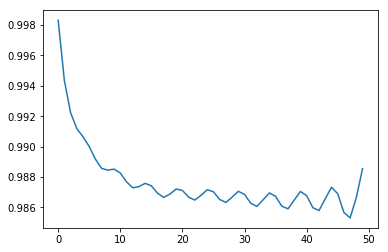

In [93]:
plt.plot(np.arange(50),
         np.absolute(np.sum(np.mean(E, axis=(1, 2)) ** 2, axis=0)**0.5))